<a href="https://colab.research.google.com/github/grace890306/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,1,28.0,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


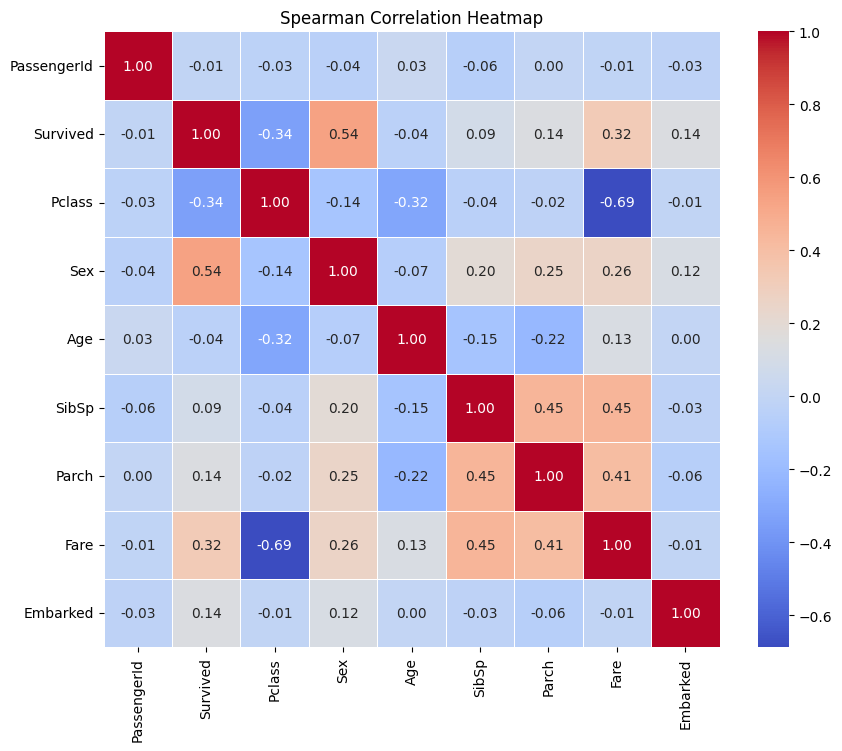

In [13]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
# 顯示完整的 DataFrame
display(df)

df_processed = df.copy()
df_processed.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True) #'Cabin'太多缺失值
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
df_processed['Embarked'] = df_processed['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_processed['Age'] = df_processed['Age'].fillna(df_processed['Age'].median())
display(df_processed)

numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

# 計算 Spearman 相關係數 (衡量非線性或單調的關係，像是survived是二元變量;適合處理類別型變量,像是sex,embarked等)
spearman_corr = df_processed.corr(method='spearman')

# 可視化相關係數矩陣為熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()
